First few rows of the dataset:
                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200       9/30/2008  Female      Service   
1      fffe3700360033003500      11/30/2008    Male      Service   
2  fffe31003300320037003900       3/10/2008  Female      Product   
3  fffe32003400380032003900       11/3/2008    Male      Service   
4  fffe31003900340031003600       7/24/2008  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                    3                   3.8   
1                 Yes            1                    2                   5.0   
2                 Yes            2                    4                   5.8   
3                 Yes            1                    1                   2.6   
4                  No            3                    7                   6.9   

   burnout  
0     0.16  
1     0.36  
2     0.49  
3     0.20  
4     0.

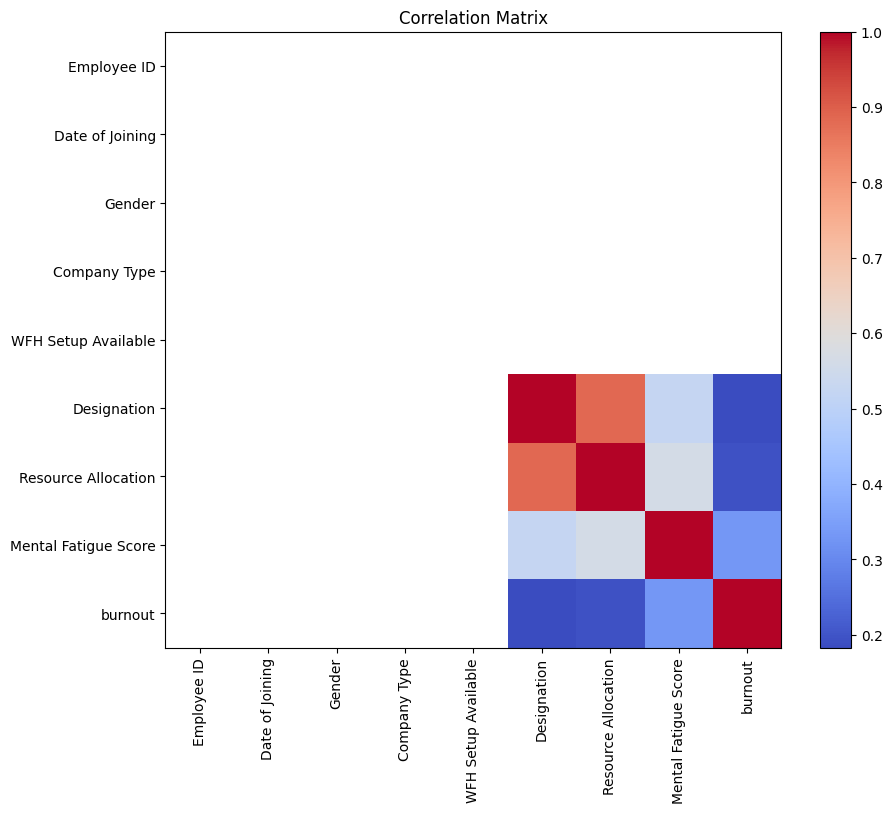

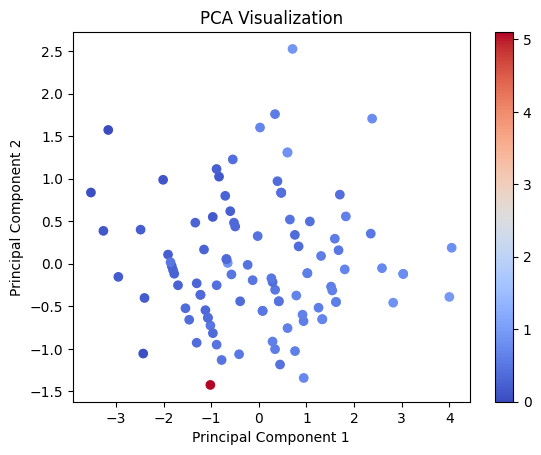

Mean Squared Error: 0.03388892141543563


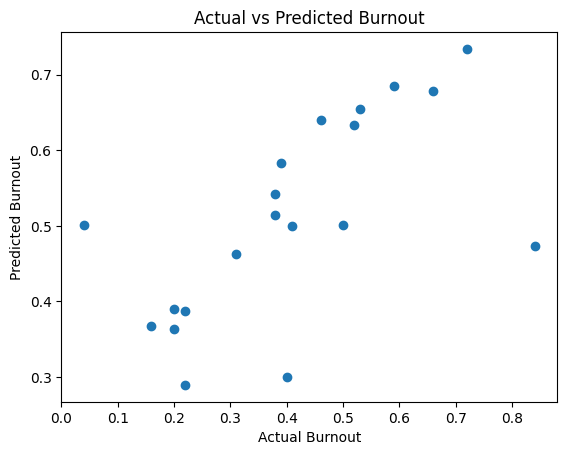

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/employee_burnout_analysis-AIML.csv')

# Drop 'Employee ID' and 'Date of Joining' columns
X = data.drop(['Employee ID', 'Date of Joining', 'Gender', 'Company Type', 'WFH Setup Available', 'burnout'], axis=1)
y = data['burnout']

# Handle missing values using SimpleImputer for features (X)
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

# Handle missing values using SimpleImputer for target variable (y)
imputer_y = SimpleImputer(strategy='mean')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Perform EDA
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check the summary statistics of the dataset
print("Summary statistics:")
print(data.describe())

# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Check the correlation between variables
# Convert relevant columns to numeric, errors='coerce' will replace non-convertible values with NaN
data_numeric = data.apply(pd.to_numeric, errors='coerce')
correlation = data_numeric.corr()
print("Correlation matrix:")
print(correlation)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.show()

# Perform Feature Extraction using PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar()
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Burnout')
plt.ylabel('Predicted Burnout')
plt.title('Actual vs Predicted Burnout')
plt.show()